In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [60]:
forecast_weather = pd.read_csv('../../Data\\capstone\\weather/solar_forecast_weather.csv')
solar = pd.read_csv('../../Data\\capstone\\weather/solar_power_2204.csv')
real_weather = pd.read_csv('../../Data/capstone/total_eda_real.csv')
solar_2 = pd.read_csv('../../Data/capstone/발전소/하동_eda.csv')

In [61]:
def time_change(data, Forecast_time):
    """
    data = forecast가 있는 데이터
    Forecast_time = 예보시간

    return = 예보시간을 기준으로 데이터를 정렬한 데이터
    """
    data[Forecast_time] = pd.to_datetime(data[Forecast_time])
    data['real_time'] = data.apply(lambda row: row['Forecast time'] + datetime.timedelta(hours=row['forecast']), axis=1)
    forecast_weather_eda = data.groupby(['real_time']).mean().drop('forecast', axis=1)
    forecast_weather_eda.reset_index(inplace=True)
    return forecast_weather_eda

In [62]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day
solar_eda = solar.groupby(['year','month','day','hour']).sum().reset_index()
solar_eda['date'] = pd.to_datetime(solar_eda[['year', 'month', 'day', 'hour']])

In [63]:
eda_forecast = time_change(forecast_weather, 'Forecast time')

In [64]:
real_weather[real_weather['지점명']=='구미']

,지점,지점명,일시,기온,풍속,풍향,습도,강수량
1504656,279,구미,2021-12-31 22:00,-4.9,1.1,320.0,36.0,0.0
1504657,279,구미,2021-01-01 01:00,-4.8,0.5,320.0,64.0,0.0
1504658,279,구미,2022-05-01 17:00,18.3,2.3,290.0,25.0,0.0
1504659,279,구미,2022-05-01 18:00,18.4,1.3,320.0,23.0,0.0
1504660,279,구미,2022-05-01 19:00,16.9,3.1,270.0,23.0,0.0
...,...,...,...,...,...,...,...,...
1522147,279,구미,2021-08-31 21:00,21.9,0.4,0.0,94.0,0.0
1522148,279,구미,2021-08-31 20:00,21.9,1.2,270.0,95.0,0.0
1522149,279,구미,2021-08-31 19:00,21.9,0.8,270.0,93.0,3.1
1522150,279,구미,2021-09-01 01:00,21.8,0.3,0.0,92.0,0.0


In [65]:
real_weather[real_weather['지점명'] =='순천']

,지점,지점명,일시,기온,풍속,풍향,습도,강수량
682344,174,순천,2022-08-31 09:00,22.9,2.6,290.0,85.0,0.0
682345,174,순천,2022-08-31 08:00,22.5,3.4,270.0,89.0,0.0
682346,174,순천,2022-08-31 07:00,22.8,3.2,270.0,92.0,0.0
682347,174,순천,2022-08-30 23:00,22.5,0.5,70.0,94.0,0.0
682348,174,순천,2022-08-31 06:00,22.5,0.8,290.0,95.0,0.2
...,...,...,...,...,...,...,...,...
699835,174,순천,2021-01-01 08:00,-7.9,0.4,0.0,95.0,0.0
699836,174,순천,2021-01-01 14:00,1.5,3.7,320.0,63.0,0.0
699837,174,순천,2021-01-01 13:00,2.0,2.9,290.0,62.0,0.0
699838,174,순천,2021-01-01 12:00,0.7,2.8,270.0,68.0,0.0


In [66]:
incheon = real_weather[real_weather['지점명'] =='순천']

In [67]:
eda_weather = incheon.drop(['지점', '지점명'], axis=1)
eda_weather['일시'] = pd.to_datetime(eda_weather['일시'])
eda_weather['hour'] = eda_weather['일시'].dt.hour
eda_weather['month'] = eda_weather['일시'].dt.month
eda_weather['year'] = eda_weather['일시'].dt.year

In [68]:
eda_weather.set_index('일시', inplace=True)

In [69]:
total_time = pd.date_range(start='2021-01-01 00:00:00', end='2022-04-30 23:00:00', freq='H')

In [70]:
solar_2

,date,hour,value
0,2013-01-01 01:00:00,1,0.0
1,2013-01-01 02:00:00,2,0.0
2,2013-01-01 03:00:00,3,0.0
3,2013-01-01 04:00:00,4,0.0
4,2013-01-01 05:00:00,5,0.0
...,...,...,...
83227,2022-06-30 20:00:00,20,7.6
83228,2022-06-30 21:00:00,21,0.0
83229,2022-06-30 22:00:00,22,0.0
83230,2022-06-30 23:00:00,23,0.0


In [71]:
solar_2.date = pd.to_datetime(solar_2.date)

In [72]:
solar_2.set_index('date', inplace=True)

In [73]:
x = eda_weather.loc['2021-01-01 00:00:00' : '2022-04-30 23:00:00']

In [74]:
x

,기온,풍속,풍향,습도,강수량,hour,month,year
일시,,,,,,,,
2022-03-02 19:00:00,5.5,2.8,340.0,40.0,0.0,19,3,2022
2022-03-02 18:00:00,7.1,3.4,320.0,34.0,0.0,18,3,2022
2022-03-02 17:00:00,9.1,4.1,290.0,29.0,0.0,17,3,2022
2022-03-02 16:00:00,9.6,4.7,320.0,30.0,0.0,16,3,2022
2022-03-02 15:00:00,9.5,5.1,320.0,29.0,0.0,15,3,2022
...,...,...,...,...,...,...,...,...
2021-01-01 08:00:00,-7.9,0.4,0.0,95.0,0.0,8,1,2021
2021-01-01 14:00:00,1.5,3.7,320.0,63.0,0.0,14,1,2021
2021-01-01 13:00:00,2.0,2.9,290.0,62.0,0.0,13,1,2021


In [75]:
solar_2

,hour,value
date,,
2013-01-01 01:00:00,1,0.0
2013-01-01 02:00:00,2,0.0
2013-01-01 03:00:00,3,0.0
2013-01-01 04:00:00,4,0.0
2013-01-01 05:00:00,5,0.0
...,...,...
2022-06-30 20:00:00,20,7.6
2022-06-30 21:00:00,21,0.0
2022-06-30 22:00:00,22,0.0


In [76]:
y = solar_2.loc['2021-01-01 00:00:00' : '2022-04-30 23:00:00']

x.drop(['위도','경도'], axis=1, inplace=True)

In [79]:
total = pd.concat([x, y], axis = 1)

In [80]:
total.interpolate(method = 'linear', inplace = True)

In [81]:
y = total.value
x = total.drop('value', axis=1)

In [84]:
slice = 455 * 24

In [85]:
x_train = x.iloc[:slice]
x_test = x.iloc[slice:]
y_train = y.iloc[:slice]
y_test = y.iloc[slice:]

In [86]:
sc = StandardScaler()

In [87]:
sc.fit(x_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [88]:
sc.fit(y_train.values.reshape(-1,1))

y_train = sc.transform(y_train.values.reshape(-1,1))
y_test = sc.transform(y_test.values.reshape(-1,1))

In [89]:
print(x_train.shape)
print(x_test.shape)

(10920, 9)
(720, 9)


In [90]:
y_train.shape

(10920, 1)

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [92]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

In [93]:
dt = DecisionTreeRegressor(max_depth=5)

In [94]:
params = {
    'n_estimators' : [5,10,50,100],
    'max_depth': [2,5,6,8,10],
    'min_samples_leaf':[4,8,12,16],
    'min_samples_split':[4,8,16,20,24]
}

In [95]:
rf = RandomForestRegressor(n_estimators=300, n_jobs = -1)
et = ExtraTreesRegressor(n_estimators=300, n_jobs = -1)
lg = LGBMRegressor(n_estimators=300, n_jobs = -1)

In [96]:
grid_cv_rf = GridSearchCV(rf, param_grid=params,
                      cv=5, n_jobs=-1)
grid_cv_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=300, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 6, 8, 10],
                         'min_samples_leaf': [4, 8, 12, 16],
                         'min_samples_split': [4, 8, 16, 20, 24],
                         'n_estimators': [5, 10, 50, 100]})

In [97]:
grid_cv_et = GridSearchCV(et, param_grid=params,
                      cv=5, n_jobs=-1)
grid_cv_et.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(n_estimators=300, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 6, 8, 10],
                         'min_samples_leaf': [4, 8, 12, 16],
                         'min_samples_split': [4, 8, 16, 20, 24],
                         'n_estimators': [5, 10, 50, 100]})

In [98]:
grid_cv_lg = GridSearchCV(lg, param_grid=params,
                      cv=5, n_jobs=-1)
grid_cv_lg.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


GridSearchCV(cv=5, estimator=LGBMRegressor(n_estimators=300), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 6, 8, 10],
                         'min_samples_leaf': [4, 8, 12, 16],
                         'min_samples_split': [4, 8, 16, 20, 24],
                         'n_estimators': [5, 10, 50, 100]})

In [99]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

optimizer =  tf.keras.optimizers.Adam(learning_rate=0.001)

In [100]:
# LSTM 모델 정의
lstm_model = Sequential()
lstm_model.add(LSTM(512, input_shape=(8, 1), return_sequences=True))
lstm_model.add(LSTM(256))
lstm_model.add(Dense(24))
lstm_model.compile(loss='mse', optimizer = optimizer, metrics=['mse'])

In [101]:
window_size = 24 * 365

In [102]:
from tqdm import tqdm

In [103]:
grid_cv_rf.best_estimator_.fit(x_train[:window_size], y_train[:window_size])
grid_cv_et.best_estimator_.fit(x_train[:window_size], y_train[:window_size])
grid_cv_lg.best_estimator_.fit(x_train[:window_size], y_train[:window_size])

LGBMRegressor(max_depth=5, min_samples_leaf=12, min_samples_split=4)

In [104]:
predictions_list = []

for i in tqdm(range(0, len(x_test), 24)):
    x_test_window = x_test[i:i+24]
    y_test_window = y_test[i:i+24]

    predictions_rf = grid_cv_rf.best_estimator_.predict(x_test_window)
    predictions_et = grid_cv_et.best_estimator_.predict(x_test_window)
    predictions_lg = grid_cv_lg.best_estimator_.predict(x_test_window)

    for j in range(24):
        predictions_list.append([predictions_rf[j], predictions_et[j], predictions_lg[j]])

    x_train = np.concatenate((x_train, x_test_window), axis=0)
    y_train = np.concatenate((y_train, y_test_window), axis=0)

    grid_cv_rf.best_estimator_.fit(x_train[i+24:i+24+window_size], y_train[i+24:i+24+window_size])
    grid_cv_et.best_estimator_.fit(x_train[i+24:i+24+window_size], y_train[i+24:i+24+window_size])
    grid_cv_lg.best_estimator_.fit(x_train[i+24:i+24+window_size], y_train[i+24:i+24+window_size])

predictions_array = np.array(predictions_list)

  3%|▎         | 1/30 [00:00<00:12,  2.41it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


  7%|▋         | 2/30 [00:00<00:11,  2.44it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 10%|█         | 3/30 [00:01<00:11,  2.44it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 13%|█▎        | 4/30 [00:01<00:10,  2.45it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 17%|█▋        | 5/30 [00:02<00:10,  2.45it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 20%|██        | 6/30 [00:02<00:09,  2.45it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 23%|██▎       | 7/30 [00:02<00:09,  2.46it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 27%|██▋       | 8/30 [00:03<00:08,  2.45it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 30%|███       | 9/30 [00:03<00:08,  2.46it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 33%|███▎      | 10/30 [00:04<00:08,  2.45it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 37%|███▋      | 11/30 [00:04<00:07,  2.45it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 40%|████      | 12/30 [00:04<00:07,  2.45it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 43%|████▎     | 13/30 [00:05<00:06,  2.45it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 47%|████▋     | 14/30 [00:05<00:06,  2.46it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 50%|█████     | 15/30 [00:06<00:06,  2.46it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 53%|█████▎    | 16/30 [00:06<00:05,  2.44it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 57%|█████▋    | 17/30 [00:06<00:05,  2.43it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 60%|██████    | 18/30 [00:07<00:04,  2.43it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 63%|██████▎   | 19/30 [00:07<00:04,  2.44it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 67%|██████▋   | 20/30 [00:08<00:04,  2.44it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 70%|███████   | 21/30 [00:08<00:03,  2.44it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 73%|███████▎  | 22/30 [00:08<00:03,  2.43it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 77%|███████▋  | 23/30 [00:09<00:02,  2.44it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 80%|████████  | 24/30 [00:09<00:02,  2.45it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 83%|████████▎ | 25/30 [00:10<00:02,  2.45it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 87%|████████▋ | 26/30 [00:10<00:01,  2.43it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 90%|█████████ | 27/30 [00:11<00:01,  2.44it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 93%|█████████▎| 28/30 [00:11<00:00,  2.45it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


 97%|█████████▋| 29/30 [00:11<00:00,  2.45it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


100%|██████████| 30/30 [00:12<00:00,  2.45it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split


lstm_model.fit(x_train[:window_size].reshape(-1, 8, 1), y_train[:window_size], epochs=100, verbose=0)

lstm_predictions_list = []

# 테스트 데이터를 24시간 단위로 이동하면서 예측
for i in tqdm(range(0, len(x_test), 24)):
    x_test_window = x_test[i:i+24].values.reshape(-1, 8, 1)
    y_test_window = y_test[i:i+24]

    predictions_lstm = lstm_model.predict(x_test_window)
    
    # 각 샘플에 대한 예측을 저장
    for j in range(24):
        lstm_predictions_list.append(predictions_lstm[j])

    # 새로운 24시간 데이터를 훈련 데이터에 추가
    x_train = np.concatenate((x_train, x_test_window.reshape(-1, 8)), axis=0)
    y_train = np.concatenate((y_train, y_test_window), axis=0)

    # 새로운 윈도우 크기로 훈련
    lstm_model.fit(x_train[i+24:i+24+window_size].reshape(-1, 8, 1), y_train[i+24:i+24+window_size], epochs=100, verbose=0)

lstm_predictions_array = np.array(lstm_predictions_list)

lstm_predictions_array.shape

plt.plot(lstm_predictions_array.reshape(-1,1)) 

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
grid_cv_rf.best_estimator_.fit(x_train[:window_size], y_train[:window_size])
grid_cv_et.best_estimator_.fit(x_train[:window_size], y_train[:window_size])
grid_cv_lg.best_estimator_.fit(x_train[:window_size], y_train[:window_size])

LGBMRegressor(max_depth=5, min_samples_leaf=12, min_samples_split=4)

In [107]:
train_predictions_list = []

# 훈련 데이터에 대한 예측 수집
for i in range(0, len(x_train), 24):
    x_train_window = x_train[i:i+window_size]

    train_predictions_rf = grid_cv_rf.best_estimator_.predict(x_train_window)
    train_predictions_et = grid_cv_et.best_estimator_.predict(x_train_window)
    train_predictions_lg = grid_cv_lg.best_estimator_.predict(x_train_window)

    for j in range(24):
        train_predictions_list.append([train_predictions_rf[j], train_predictions_et[j], train_predictions_lg[j]])

In [108]:
train_predictions_array = np.array(train_predictions_list)

In [109]:
meta_model = LinearRegression()

In [110]:
meta_model.fit(train_predictions_array, y_train[:len(train_predictions_array)])

LinearRegression()

In [128]:
meta_result_change = np.maximum(meta_result, 0)

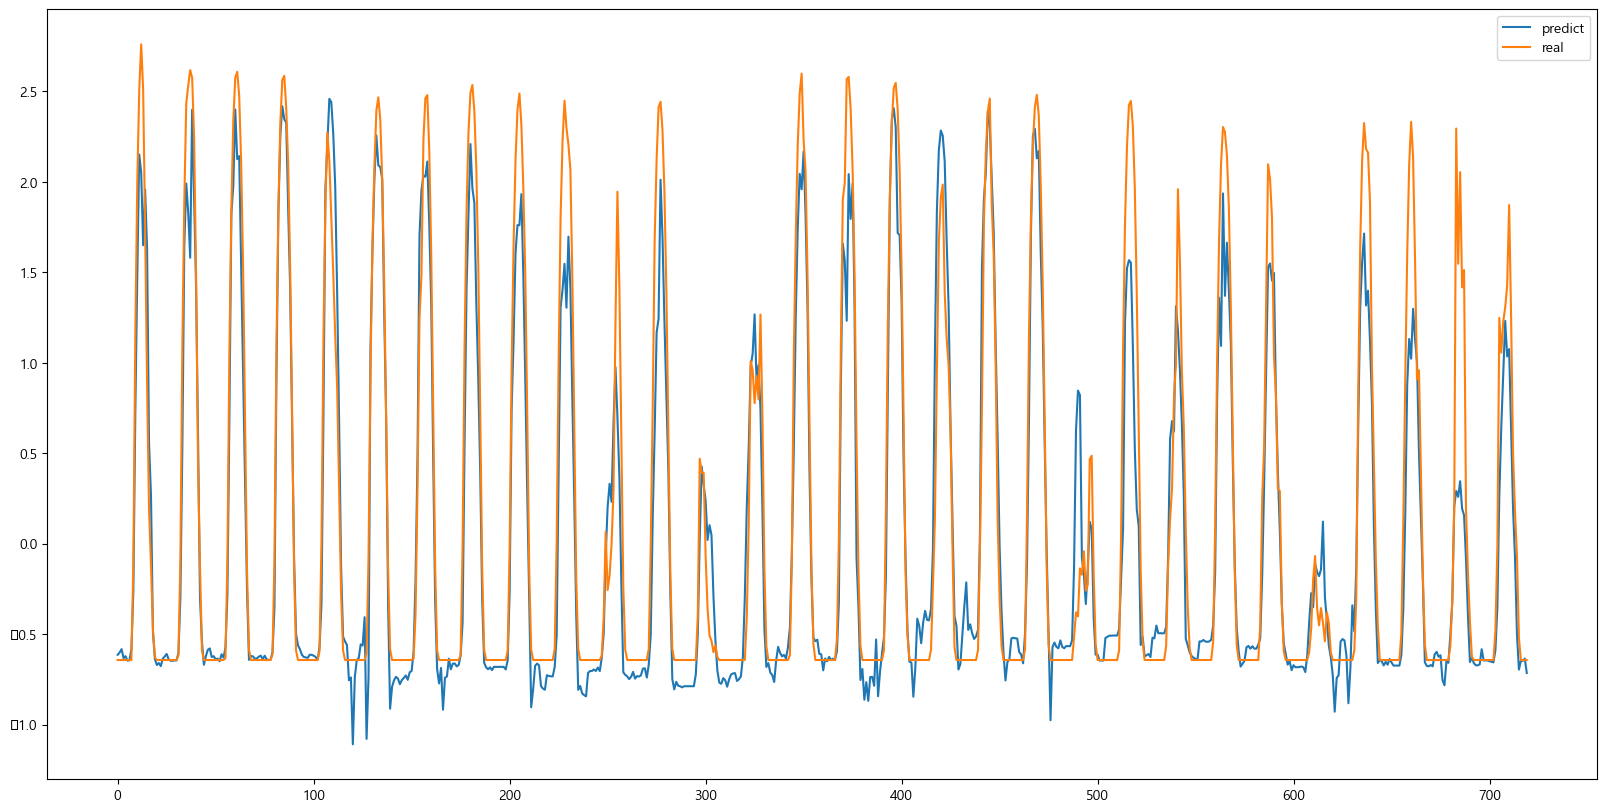

In [132]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(meta_result)), meta_result, label='predict')
plt.plot(np.arange(len(meta_result)), y_test, label='real')
plt.legend()
plt.show()

In [113]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [137]:
mean_absolute_error(sc.inverse_transform(meta_result), sc.inverse_transform(y_test))

268.4981167090032

In [135]:
mean_absolute_error(np.maximum(sc.inverse_transform(meta_result),0), sc.inverse_transform(y_test))

242.68173904627903

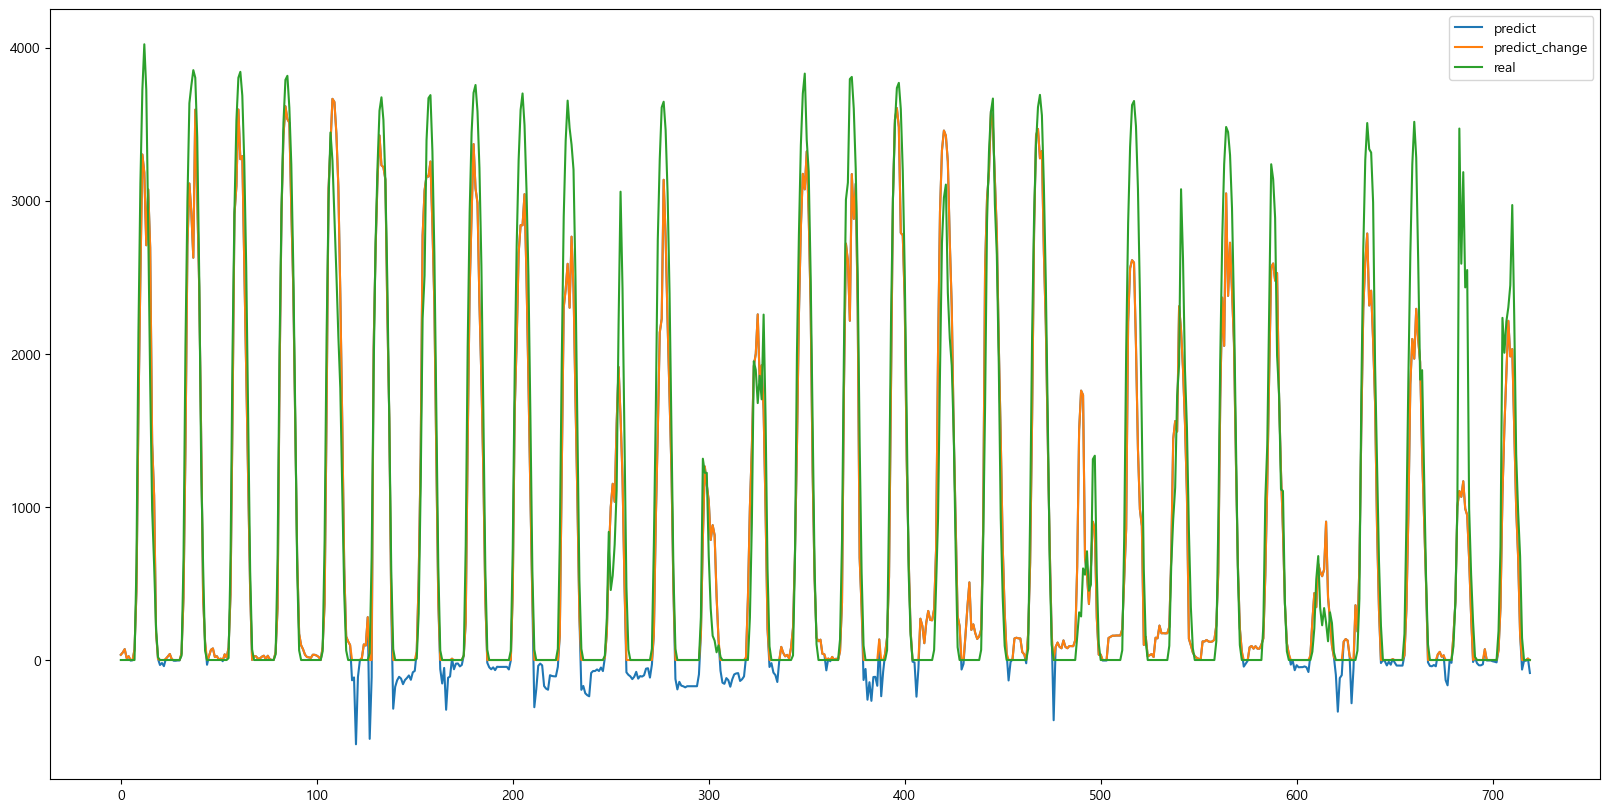

In [136]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(meta_result)), sc.inverse_transform(meta_result), label='predict')
plt.plot(np.arange(len(meta_result)), np.maximum(sc.inverse_transform(meta_result),0), label='predict_change')
plt.plot(np.arange(len(meta_result)), sc.inverse_transform(y_test), label='real')
plt.legend()
plt.show()

In [ ]:
meta_result = meta_model.predict(np.nan_to_num(predictions_array, nan = 0))

In [115]:
sc.inverse_transform(y_test)

array([[0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [6.2880e+02],
       [2.1332e+03],
       [3.1136e+03],
       [3.7228e+03],
       [4.0216e+03],
       [3.7244e+03],
       [2.8200e+03],
       [1.8052e+03],
       [9.8160e+02],
       [6.2080e+02],
       [2.0080e+02],
       [1.7200e+01],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [2.8400e+01],
       [6.5360e+02],
       [2.0512e+03],
       [2.9964e+03],
       [3.6372e+03],
       [3.7520e+03],
       [3.8528e+03],
       [3.8032e+03],
       [3.4140e+03],
       [2.5220e+03],
       [1.2740e+03],
       [6.1400e+02],
       [6.1200e+01],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.000

In [116]:
mean_squared_error(y_test, meta_result)

0.12710818384141526

In [117]:
mean_absolute_error(y_test, meta_result)

0.22721499877559848

In [118]:
mean_absolute_error(y_test[:24], meta_result[:24])

0.21179751324264148

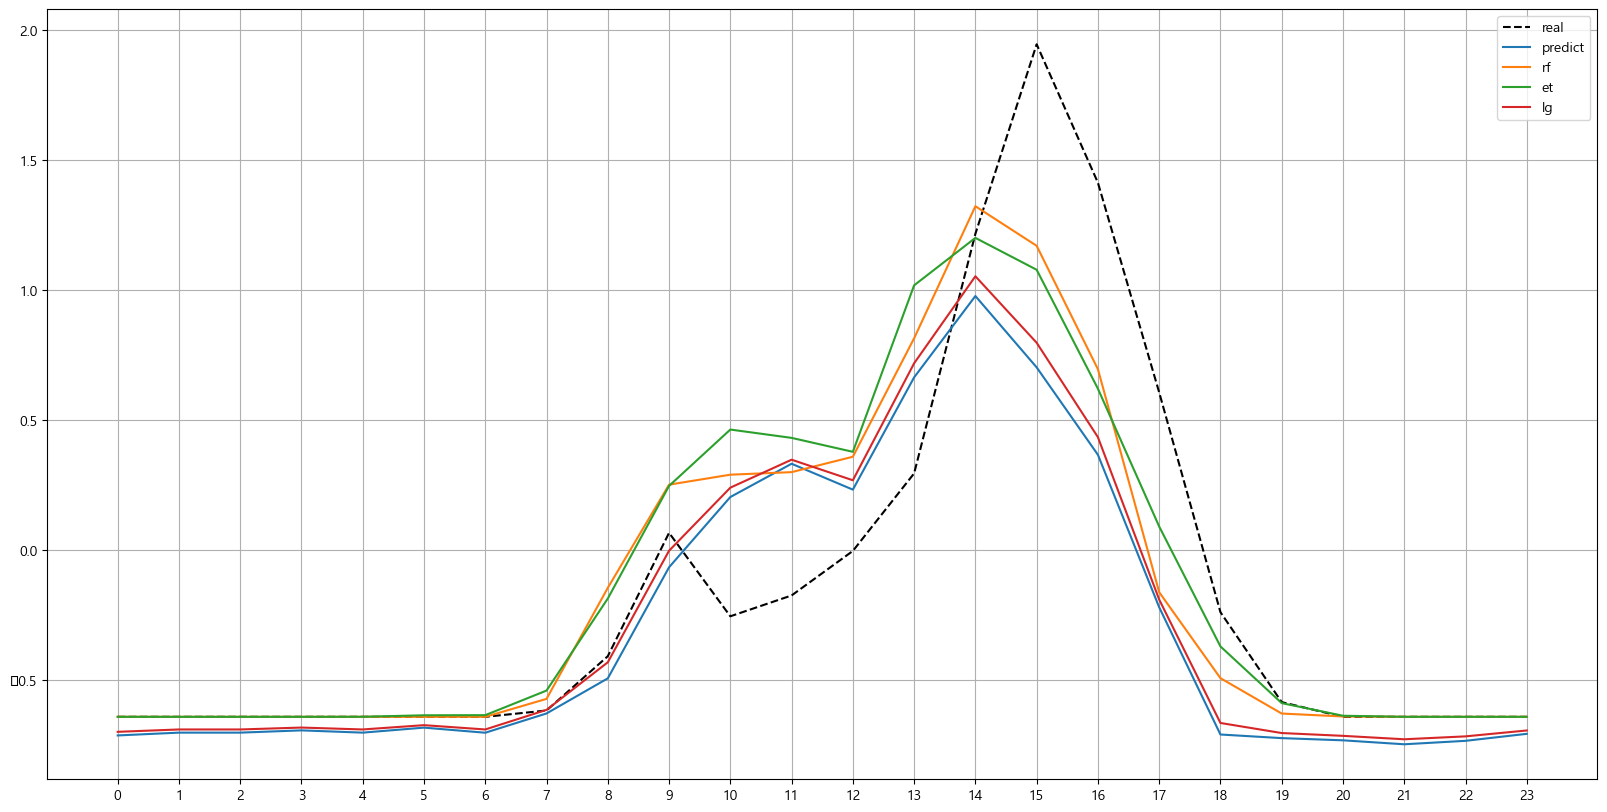

0.27208669899944543

In [119]:
i = 10
plt.figure(figsize=(20,10))
plt.plot(np.arange(24), y_test[i * 24 : 24*(i+1)], 'k--')
plt.plot(np.arange(24), meta_result[i * 24 : 24*(i+1)])

plt.plot(np.arange(24), pd.DataFrame(predictions_array).iloc[i * 24 : 24*(i+1),0])
plt.plot(np.arange(24), pd.DataFrame(predictions_array).iloc[i * 24 : 24*(i+1),1])
plt.plot(np.arange(24), pd.DataFrame(predictions_array).iloc[i * 24 : 24*(i+1),2])
plt.legend(['real','predict', 'rf', 'et', 'lg'])
plt.xticks(np.arange(24))
plt.grid()
plt.show()

mean_absolute_error(y_test[i * 24 : 24*(i+1)], meta_result[i * 24 : 24*(i+1)])

# MAP